Digite o número da coluna a ser considerada (índice baseado em zero):  0


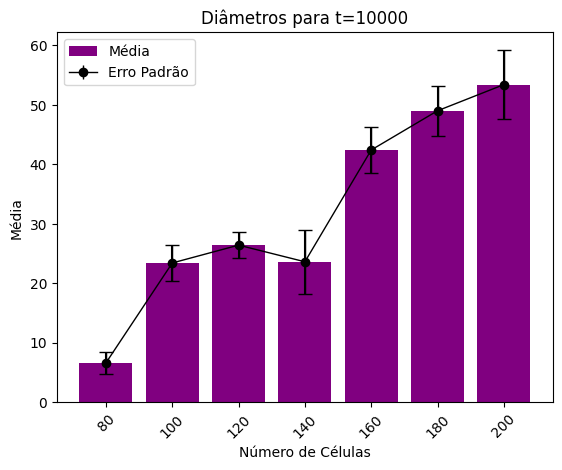

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Função para ler os valores de uma tabela de um arquivo txt, pulando a primeira linha
def ler_tabela(nome_arquivo, coluna=1):
    with open(nome_arquivo, 'r') as f:
        # Lê todas as linhas do arquivo
        linhas = f.readlines()
        
        # Remove a primeira linha (cabeçalho)
        linhas = linhas[1:]
        
        # Converte os valores das linhas restantes para float
        valores = []
        for linha in linhas:
            partes = linha.strip().split(';')
            if len(partes) > coluna and partes[coluna].strip() != '':
                valores.append(float(partes[coluna]))
    return valores

# Lista com os nomes dos arquivos de texto das tabelas
arquivos_tabelas = ['diameter-branches-10000-80.txt', 'diameter-branches-10000-100.txt', 'diameter-branches-10000-120.txt', 'diameter-branches-10000-140.txt', 'diameter-branches-10000-160.txt', 'diameter-branches-10000-180.txt', 'diameter-branches-10000-200.txt']

# Escolha da coluna para calcular a média
coluna_escolhida = int(input("Digite o número da coluna a ser considerada (índice baseado em zero): "))

# Lista para armazenar as médias e os erros padrão
medias = []
erros_padrao = []

# Lê os valores das tabelas e calcula as médias e os erros padrão
for arquivo in arquivos_tabelas:
    valores_tabela = ler_tabela(arquivo, coluna_escolhida)
    media_tabela = np.mean(valores_tabela)
    erro_padrao_tabela = np.std(valores_tabela) / np.sqrt(len(valores_tabela))
    medias.append(media_tabela)
    erros_padrao.append(erro_padrao_tabela)

# Lista com os nomes das tabelas
nomes_tabelas = ['80', '100', '120', '140', '160', '180', '200']

# Plotagem do gráfico de barras com marcadores e linha de desvio padrão
plt.bar(nomes_tabelas, medias, yerr=erros_padrao, capsize=5, color='purple', label='Média')
plt.errorbar(nomes_tabelas, medias, yerr=erros_padrao, fmt='-o', color='black', linewidth=1, label='Erro Padrão')
plt.xlabel('Número de Células')
plt.ylabel('Média')
plt.title('Diâmetros para t=10000') # diametros coluna 0
plt.xticks(rotation=45)  # Rotaciona os nomes das tabelas para melhor visualização
plt.legend()
plt.show()
